In [1]:
using Plots, LaTeXStrings
default(leg=false, lw=2)
# plotly()
# gr()

# Układ dwóch neuronów McCullocha-Pittsa
*Wang X., Complex Systems **5**, 425 (1991)*

<img src="2neurony.jpg" style="height:200px">

$$
S_1(t+1)=f [( w_{11}S_1(t)+w_{12}S_2(t) ]
$$
$$
S_2(t+1)=f [( w_{21}S_1(t)+w_{22}S_2(t) ]
$$

## Funkcja aktywacji
$$
f(x) = \frac{1}{1+e^{-\mu x}}
$$

In [2]:
f(x,μ)=1/(1+exp(-μ*x));

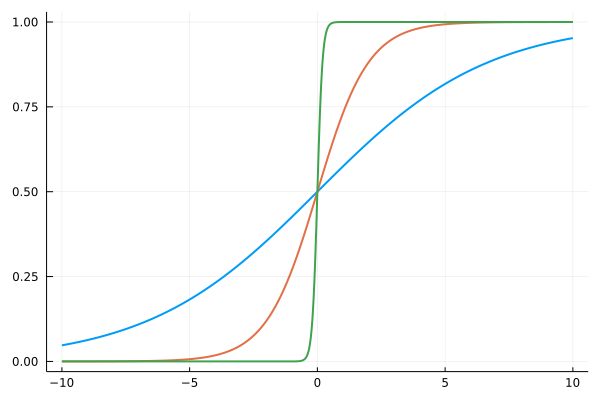

In [3]:
x=-10:0.01:10
plot(x, f.(x,0.3))
plot!(x, f.(x,1))
plot!(x, f.(x,10))

### Wagi połączeń

In [4]:
a, b = -5., -25.
W=[a -a ; b -b]

2×2 Matrix{Float64}:
  -5.0   5.0
 -25.0  25.0

In [5]:
function run(μ, w, steps=100, trans=1000)
    S=[0.35 ; 0.55]
    for i in 1:trans
        S=f.(w*S,μ)
    end

    X=[]
    Y=[]
    for i in 1:steps
        S=f.(w*S,μ)
        append!(X,S[1])
        append!(Y,S[2])
    end
    X,Y
end

run (generic function with 3 methods)

In [6]:
# 1, 2, 2.4, 2.55, 3(c), 4(c), 4.5(3), 4.6(5)
μ=4.5
n=1000
x,y=run(μ,W,n);

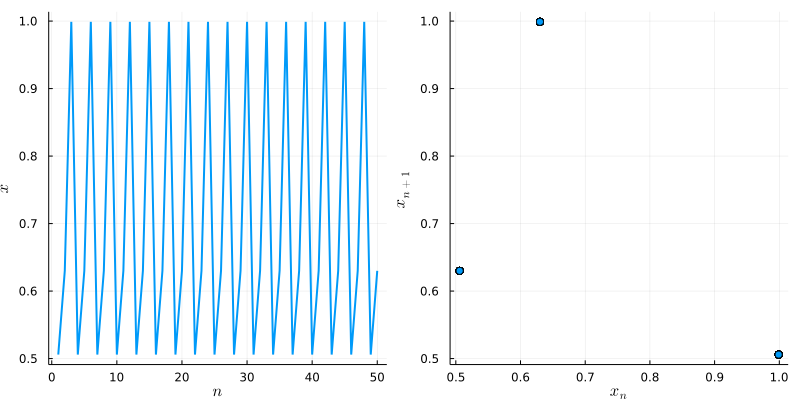

In [7]:
m=50
p1=plot(x[1:m], xlabel=L"$n$", ylabel=L"x")
p2=scatter(x[1:n-1],x[2:n], xlabel=L"x_n", ylabel=L"x_{n+1}")
plot(p1, p2, size=(800,400))

In [8]:
X=[]
Y=[]
Mx=[]
My=[]

n=50
for μ in 0:0.01:6
    x,y=run(μ,W,n)
    unique!(x)
    unique!(y)
    append!(X, x)
    append!(Y, y)
    append!(Mx, μ*ones(length(x)))
    append!(My, μ*ones(length(y)))
end

In [9]:
p1=scatter(Mx,X, markersize=1, markercolor=:black, alpha=0.5)
p2=scatter(My,Y, markersize=1, markercolor=:black, alpha=0.5)
plot(p1, p2, layout=(2,1))